In [15]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Ala\Downloads\OneDrive_1_21-04-2022\VLagun_Phys_Years3.csv')

In [5]:
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [6]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (96, 8)
Shape of X_test: (24, 8)


In [17]:
def confusion_mat(Y_pred, Y_test):
    plt.figure()
    cm = confusion_matrix(Y_pred, Y_test)
    sns.heatmap(cm,annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

Accuracy: 0.9583333333333334


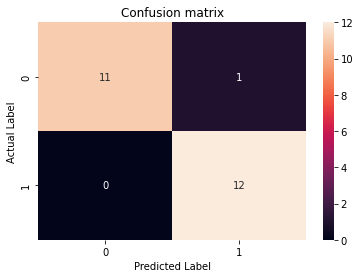

In [18]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators =100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", np.mean(predicted==y_test))
Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, y_test)

Accuracy: 0.7083333333333334


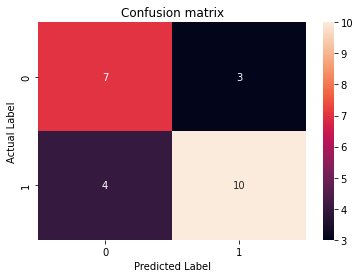

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators =100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", np.mean(predicted==y_test))
Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, y_test)

C:\Users\Ala\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8333333333333334


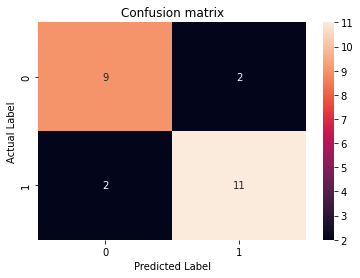

In [20]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators =100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", np.mean(predicted==y_test))
Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, y_test)

In [21]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", np.mean(predicted==y_test))
Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, y_test)

ModuleNotFoundError: No module named 'lightgbm'

In [22]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", np.mean(predicted==y_test))
Y_pred = clf.predict(X_test)
confusion_mat(Y_pred, y_test)


ModuleNotFoundError: No module named 'catboost'